## WorldView Jitter Plot Example for Salar de Uyuni with `asp_plot`

This notebook demonstrates CSM camera analysis to compare original and optimized camera models, using example WorldView satellite data from Salar de Uyuni.

## CSM Camera Model Analysis

Compare original and optimized CSM (Community Sensor Model) camera models from `bundle_adjust` or `jitter_solve`.

Visualizes:
- Position differences (X, Y, Z) along the satellite orbit
- Orientation angle differences (roll, pitch, yaw)
- Camera footprints on a map

**Note**: This example uses different test data (Salar de Uyuni, Bolivia) to demonstrate jitter correction.

In [1]:
import contextily as ctx
from asp_plot.csm_camera import csm_camera_summary_plot

In [2]:
map_crs = "32619" # UTM 19S (for Uyuni)
title = "Jitter correction (Uyuni), Less Constrained"

ctx_kwargs = {
    "crs": f"EPSG:{map_crs}",
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

# First set of cameras (scene 1)
original_camera = "../../tests/test_data/jitter/uyuni/csm-104001001427B900.r100.adjusted_state.json"
optimized_camera = "../../tests/test_data/jitter/uyuni/jitter_solved_run-csm-104001001427B900.r100.adjusted_state.json"
cam1_list = [original_camera, optimized_camera]

# Second set of cameras (scene 2)
original_camera = "../../tests/test_data/jitter/uyuni/csm-1040010014761800.r100.adjusted_state.json"
optimized_camera = "../../tests/test_data/jitter/uyuni/jitter_solved_run-csm-1040010014761800.r100.adjusted_state.json"
cam2_list = [original_camera, optimized_camera]

### CSM Camera Comparison (Basic)

Basic comparison without trimming or scaling.

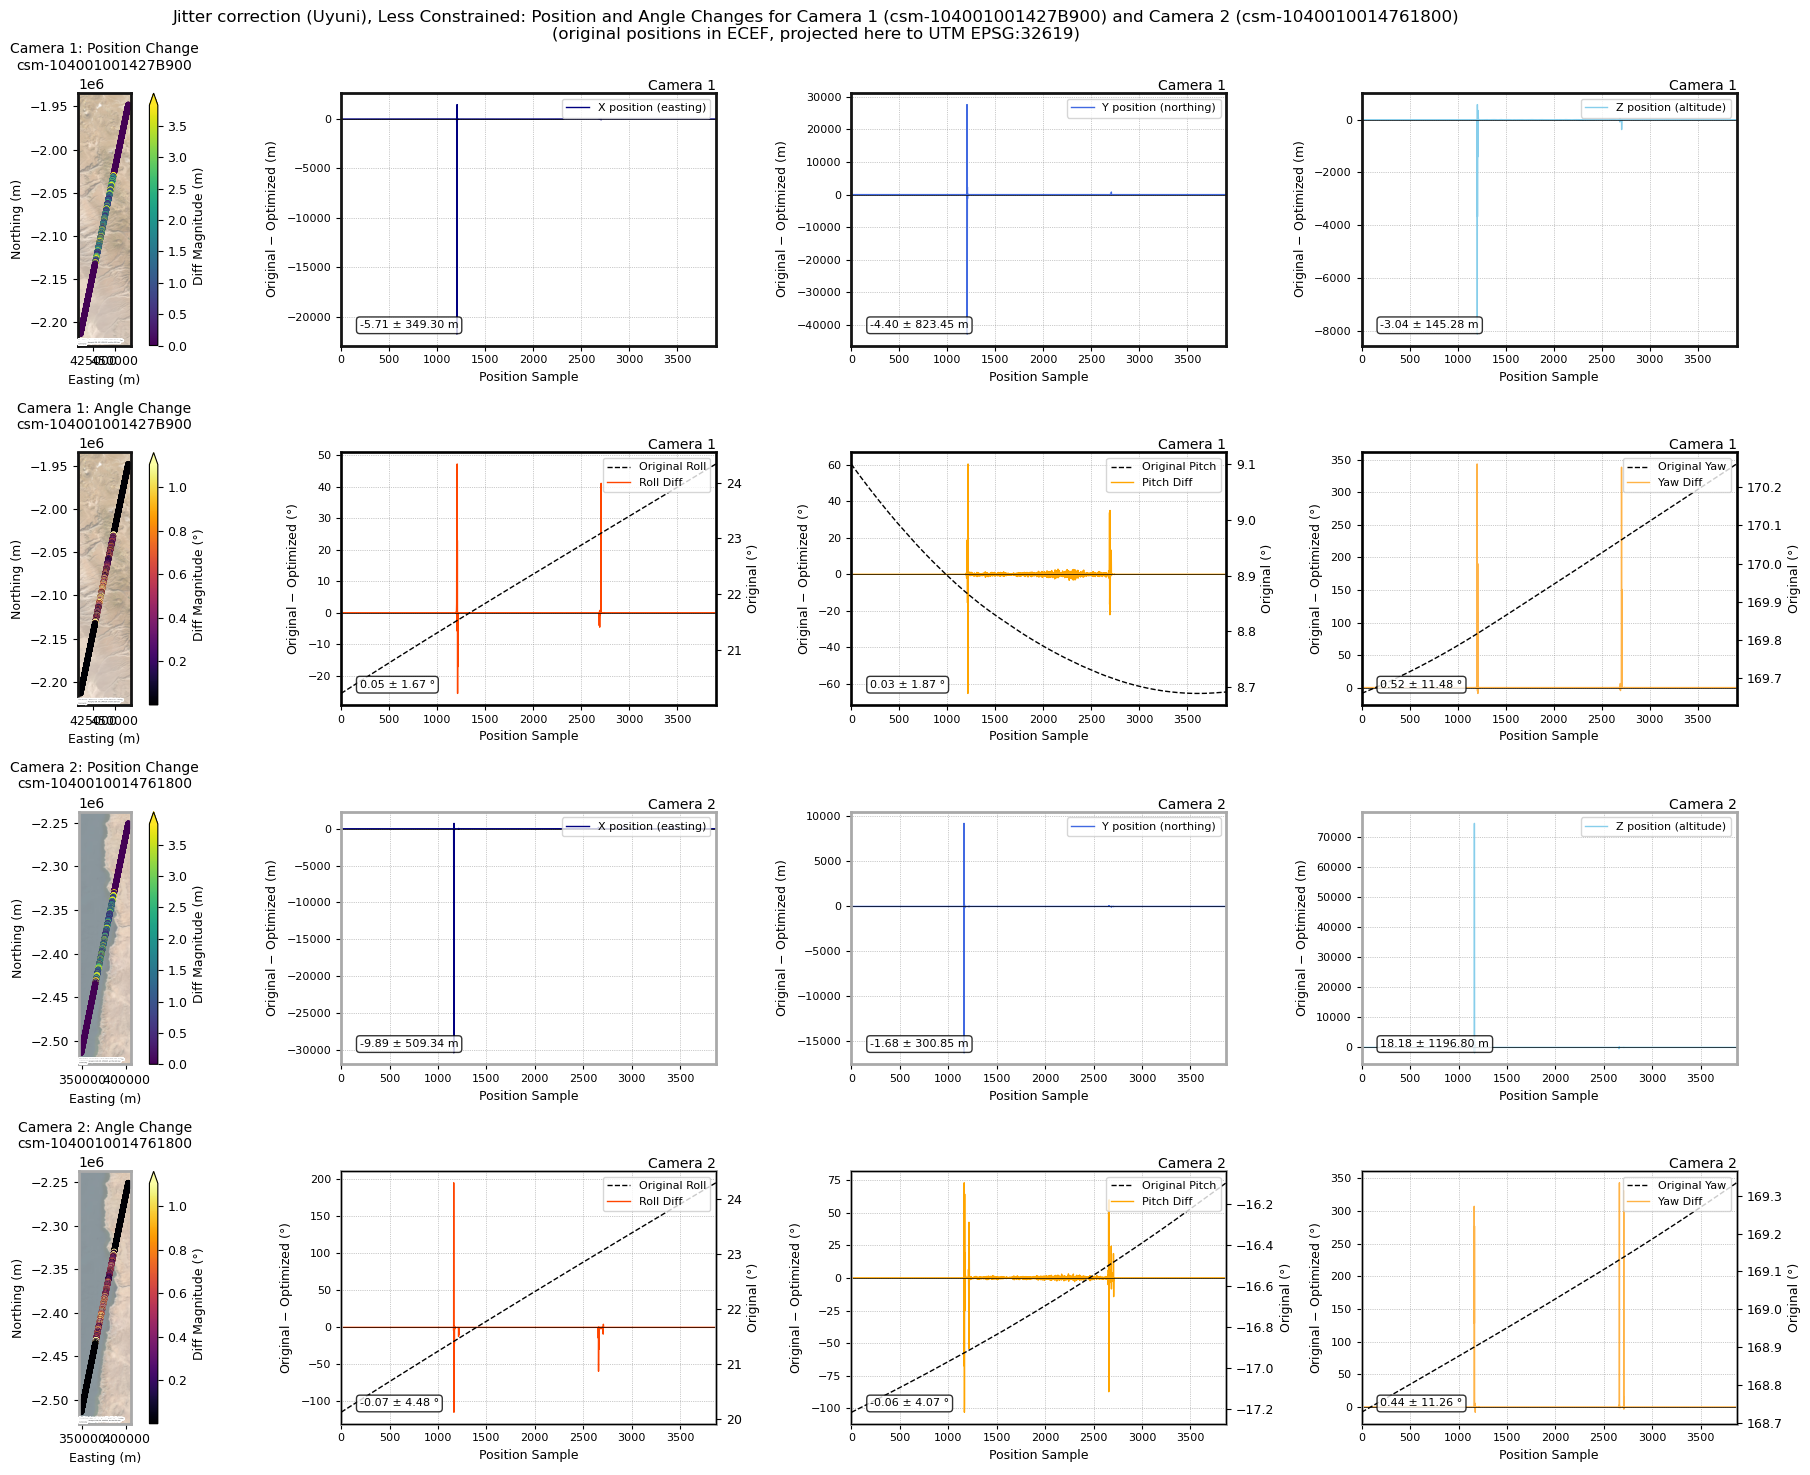

In [3]:
csm_camera_summary_plot(
    cam1_list,
    cam2_list,
    map_crs=map_crs,
    title=title,
    trim=False,
    figsize=(20, 15),
    add_basemap=True,
    **ctx_kwargs
)

### CSM Camera Comparison (Advanced)

With trimming, log scaling, and percentile-based color limits to emphasize patterns.

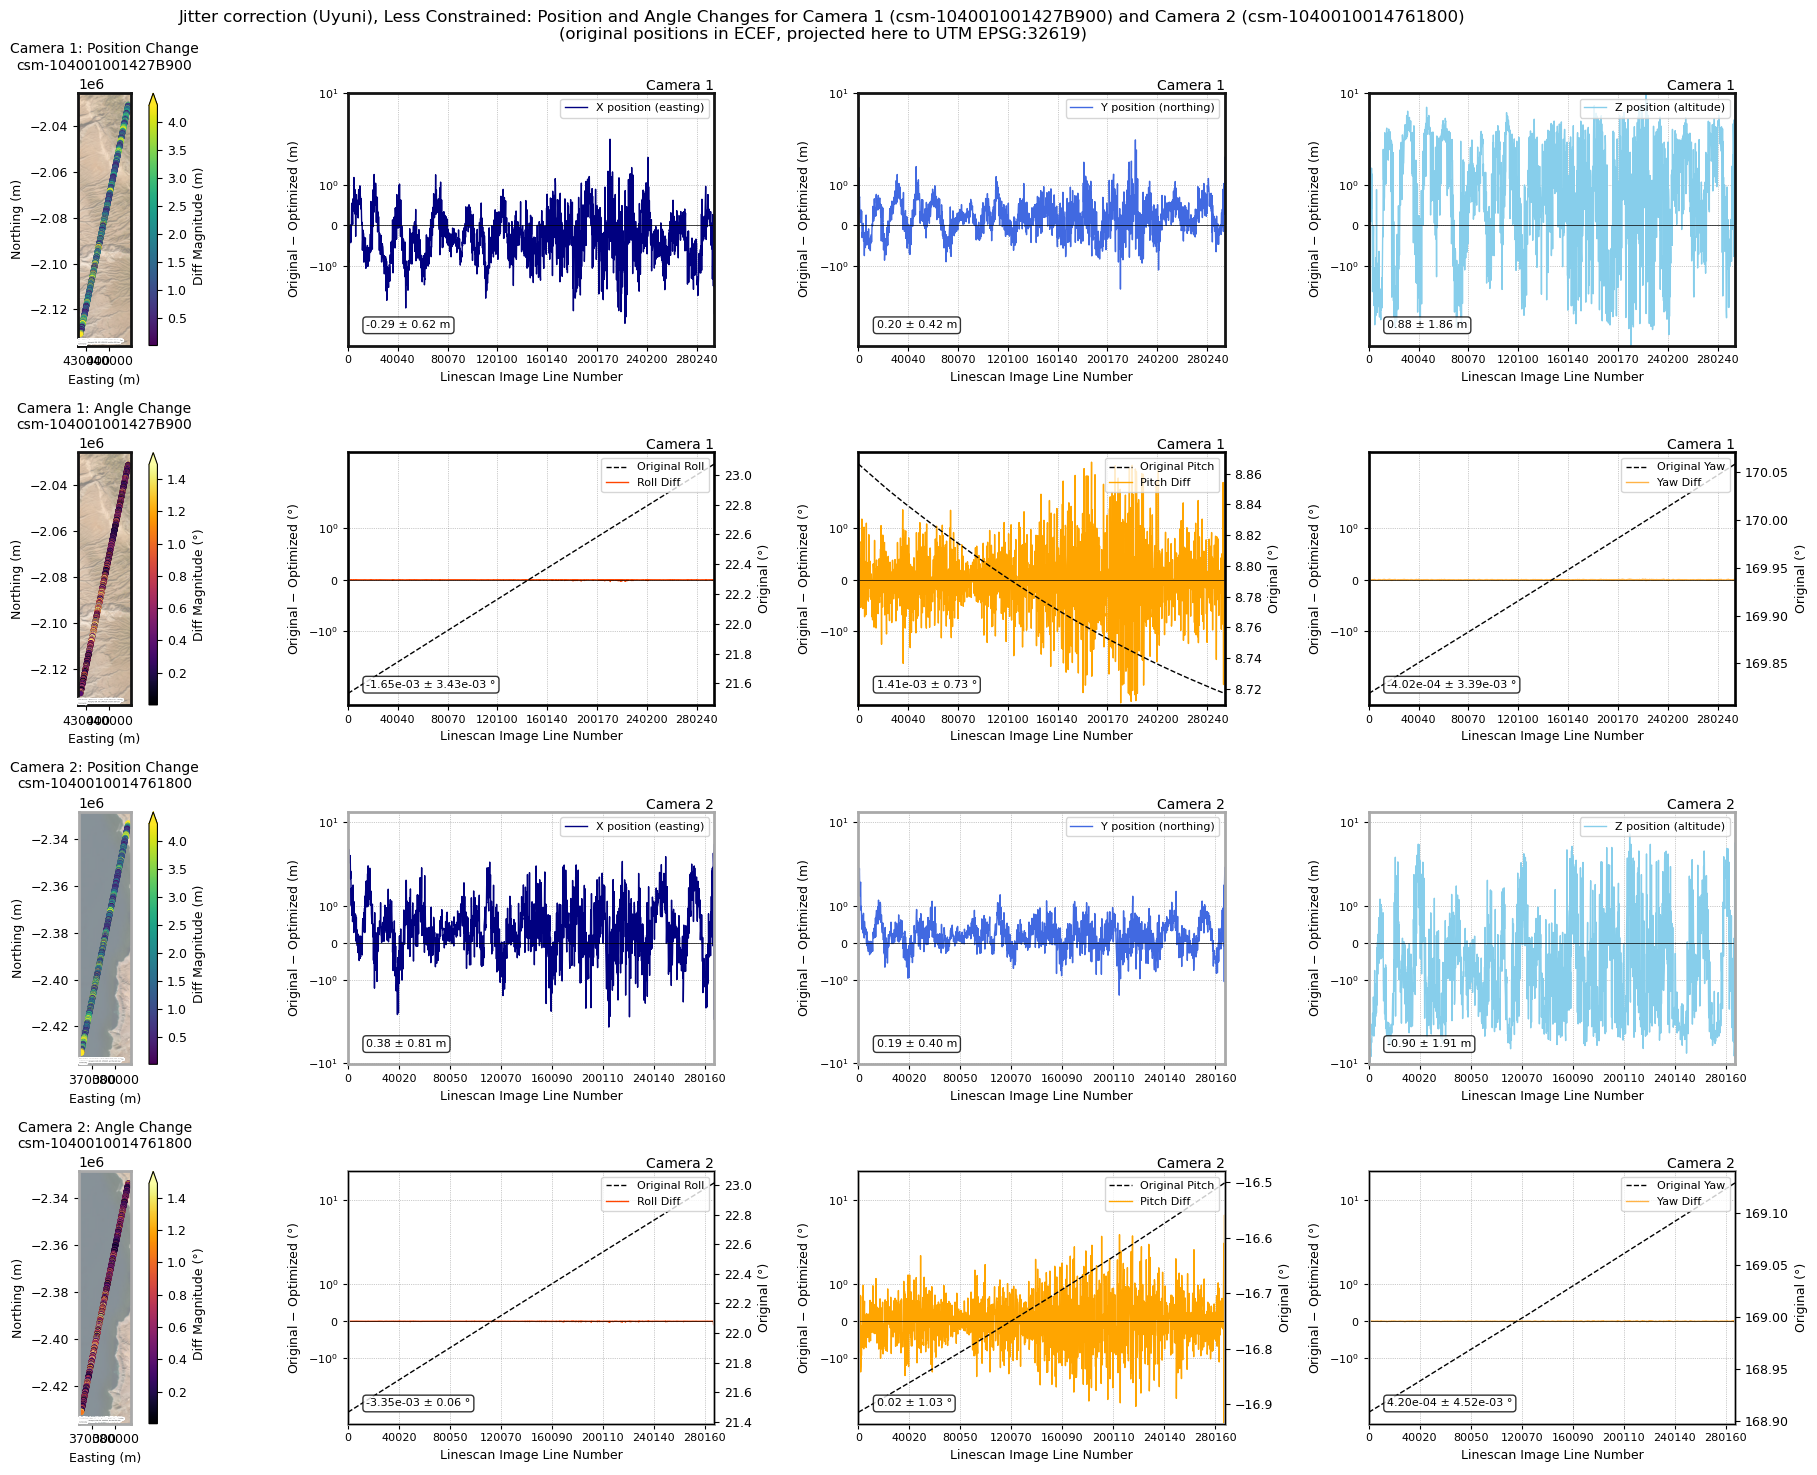

In [4]:
csm_camera_summary_plot(
    cam1_list,
    cam2_list,
    map_crs=map_crs,
    title=title,
    trim=True,
    shared_scales=True,
    log_scale_positions=True,
    log_scale_angles=True,
    upper_magnitude_percentile=95,
    figsize=(20, 15),
    add_basemap=True,
    **ctx_kwargs
)

### Single Camera Comparison

You can also analyze a single satellite by passing only `cam1_list`.

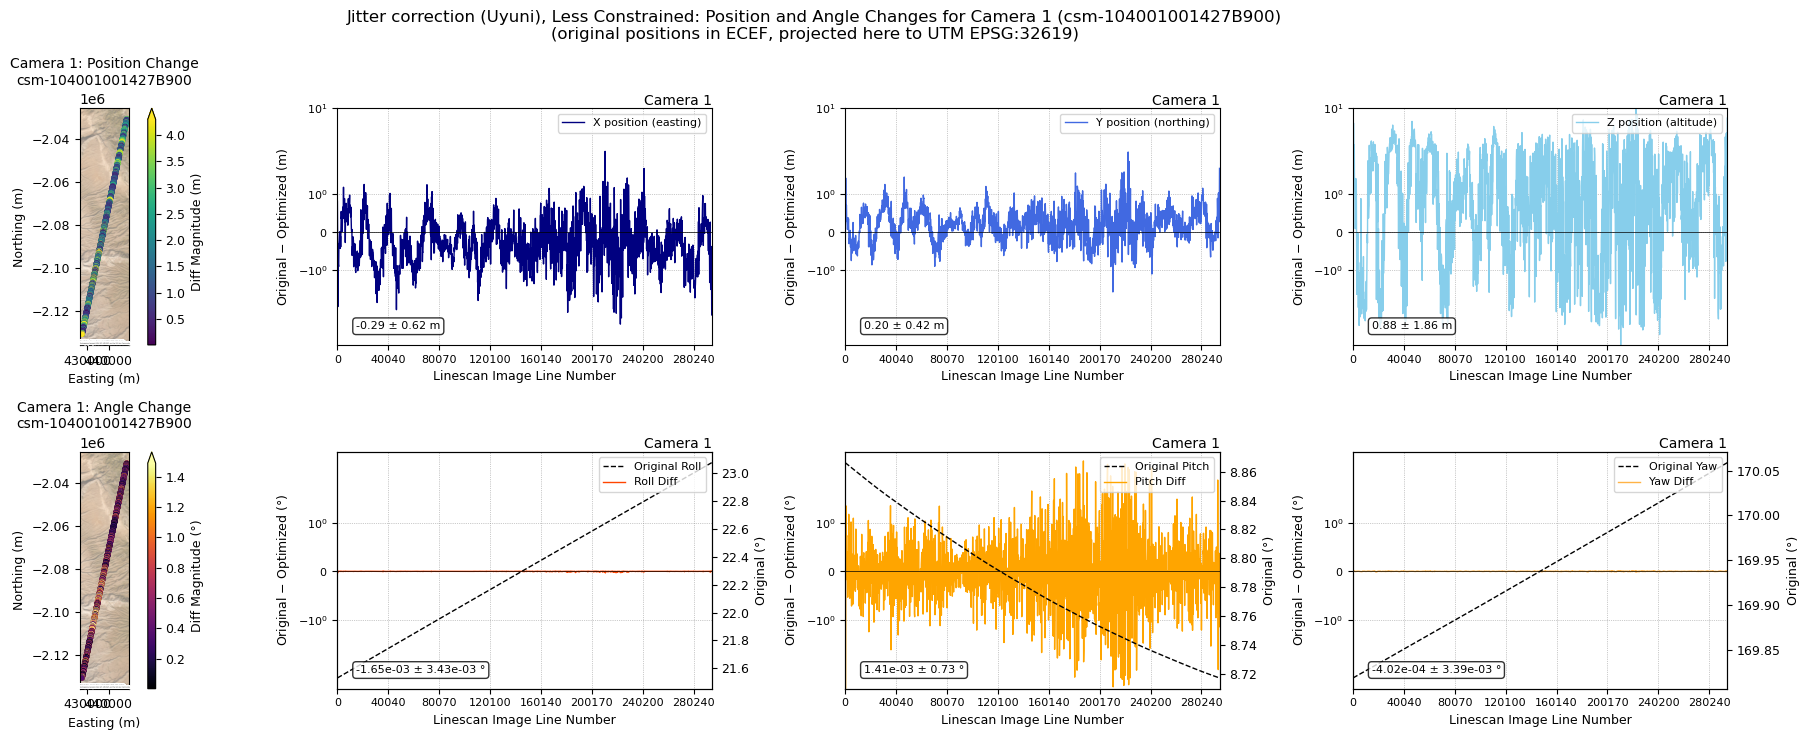

In [5]:
csm_camera_summary_plot(
    cam1_list,
    map_crs=map_crs,
    title=title,
    trim=True,
    shared_scales=True,
    log_scale_positions=True,
    log_scale_angles=True,
    upper_magnitude_percentile=95,
    figsize=(20, 15),
    add_basemap=True,
    **ctx_kwargs
)